# Individual Planning Report  
#### github link: https://github.com/Yifan669/Project_individual_plan.git

## 1. load package

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## 2. Import data

In [2]:
url = 'https://drive.google.com/uc?export=download&id=1CwjG1G1zX1CAuvYRNh7vd07ETVWACEiA'
players <- read_csv(url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [3]:
url = 'https://drive.google.com/uc?export=download&id=1u8Vt1ThdXgK9nXPrEIQgSFcsGSitQHPI'
sessions <- read_csv(url)
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


## 3. Data Description

### How the data were collected

The gameplay-related variables (e.g., `played_hours`, sessions dataset) were likely collected automatically from the game servers. However, some variables(such as `gender` or `experience`) may require voluntary responses from participants.

### Summary statistics(Players)

In [4]:
played_hours_summary <- players |>
  summarize(played_hours_mean = mean(played_hours, na.rm = TRUE),
            played_hours_min = min(played_hours, na.rm = TRUE),
            played_hours_max = max(played_hours, na.rm = TRUE),
            played_hours_sd = sd(played_hours, na.rm = TRUE))

age_summary <- players |>
  summarize(age_mean = mean(Age, na.rm = TRUE),
            age_min = min(Age, na.rm = TRUE),
            age_max = max(Age, na.rm = TRUE),
            age_sd = sd(Age, na.rm = TRUE))

played_hours_summary
age_summary

played_hours_mean,played_hours_min,played_hours_max,played_hours_sd
<dbl>,<dbl>,<dbl>,<dbl>
5.845918,0,223.1,28.35734


age_mean,age_min,age_max,age_sd
<dbl>,<dbl>,<dbl>,<dbl>
21.13918,9,58,7.389687


In [5]:
experience_categories <- players |>
     distinct(experience)
experience_categories
gender_categories <- players |>
     distinct(gender)
gender_categories

experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


In [6]:
dim(players)

[1] 196   7

### Players dataset overview:
+ number of observations: 196
+ number of variables: 7  

### The variables in players dataset are:
+ `experience` is a character variable that records player's experience level in the game, such as `Pro`,`Veteran`, `Amateur`, `Regular`, and `Beginner`.
+ `subscribe` is a logical variable that indicates whether the players subscribed to a game-related newsletter, with `TRUE` meaning subscribed and `FALSE` meaning not subscribed.
+ `hashedEmail` is a character variable that records the uniquely hashed email addresses of players.
+ `played_hours` is a double variable that records the total number of hours each player has played on the MineCraft server. The mean `played_hours` is 5.85 hours, with a minimum of 0 hours, a maximum of 223.10 hours, and a standard deviation of 37.13 hours.
+ `name` is a character variable that records the player's in-game name.
+ `gender` is a character variable that records the player’s reported gender, such as `Male`, `Female`, `Non-binary`, `Prefer not to say`, `Agender`, `Two-Spirited`, and `Other`.
+ `Age` is a double variable that records the player's age in years. The mean `Age` is 21.14 years old, with a minimum of 9 years old, a maximum of 58 years old, and a standard deviation of 7.65 years old.

### Potential Issues

+ The minimum `played_hours` is 0. This may indicate inactive players or those who registered for the game but never participated.
+ The `hashedEmail` column is difficult to interpret and may provide meaningless information for analysis.
+ The `name` column may be useless for analysis.
+ Some categories in `experience` and `gender` may be underrepresented. According to the graphs below, we can see that in `gender`, the counts of `Agender`, `Other`, and `Two-Spirited` are very small compared to `Male` and `Female`. In `experience`, certain levels such as `Pro`, `Beginner`, and `Regular` have fewer observations than `Amateur`, and `Veteran`. This may affect predictive modeling because models may be biased toward majority classes.

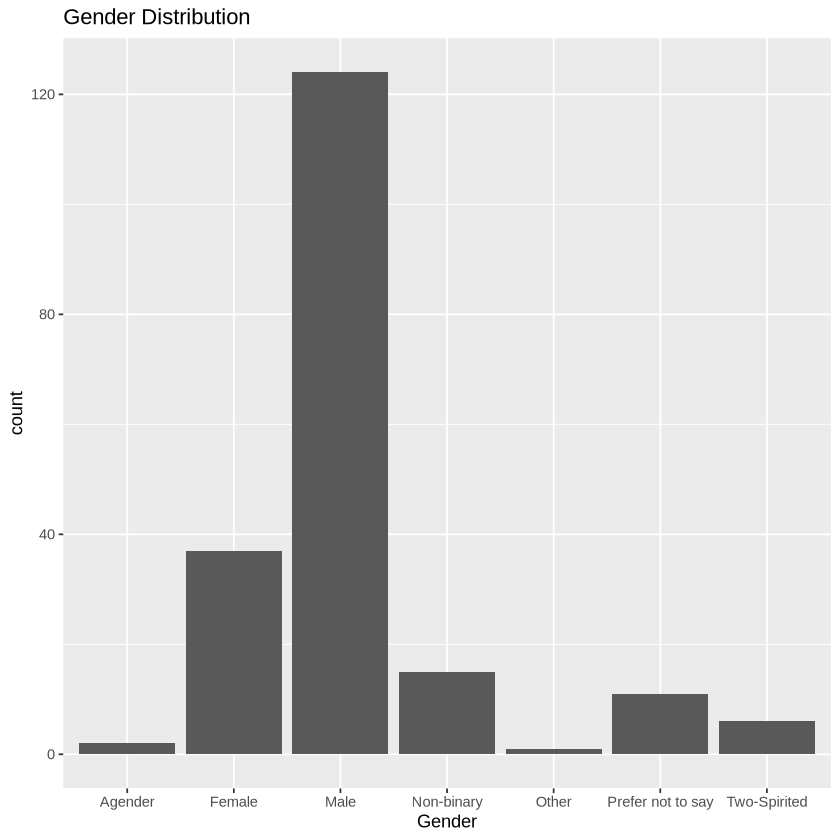

In [7]:
gender_distribution <- players |>
ggplot(aes(x = gender)) +
geom_bar() +
xlab("Gender") +
ggtitle("Gender Distribution")
gender_distribution

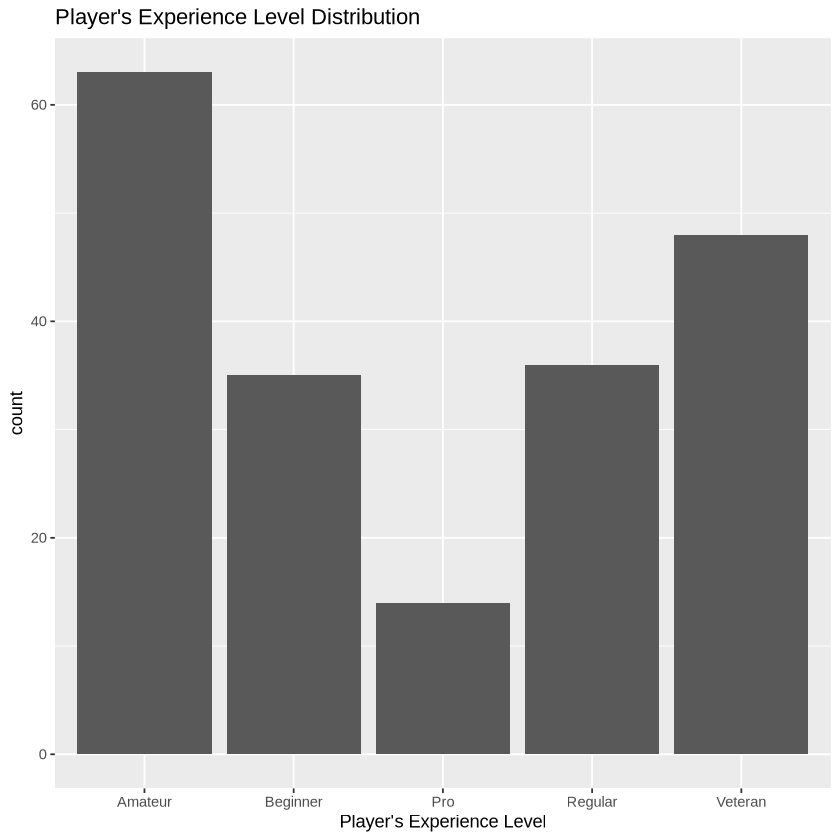

In [8]:
exp_distribution <- players |>
ggplot(aes(x = experience)) +
geom_bar() +
xlab("Player's Experience Level") +
ggtitle("Player's Experience Level Distribution")
exp_distribution

In [9]:
dim(sessions)

[1] 1535    5

### Sessions dataset overview:
+ number of observations: 1535
+ number of variables: 5

### The variables in sessions dataset are:
+ `hashedEmail` is a character variable that records the uniquely hashed email addresses of players.
+ `start_time` is a character variable that records the time when players start playing the game.
+ `end_time` is a character variable that records the time when players stop playing the game.
+ `original_start_time` is a double variable that records the original start time accepted by the computer system.
+ `original_end_time` is a double variable that records the original end time accepted by the computer system.

### Potential Issues
+ The two columns (`original_start_time` and `original_end_time`) are not explicitly defined and are not human-readable.

In this project, I will answer question 1. I think the sessions dataset is not helpful for my project. In the following sections, I will focus on the players dataset and disregard the sessions dataset.

## 4. Questions

I choose question 1.  
**Broad Question** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?  
**Specific Question** Can a player's `experience` level, `Age`, and `played_hours` predict whether they subscribe to the newsletter in the players dataset?  
In particular, I will use `experience`,`Age` and `played_hours` as predictors to predict `subscribe`. I don’t use gender as a predictor because it has a serious class imbalance, which could affect the prediction results.
+ response variable: `subscribe`
+ Explanatory variable: `experience`, `Age`, and `played_hours`

**Data Wrangling Plan**
+ I will filter out players with `played_hours` = 0, as these players may be inactive or may have registered for the game but never participated.
+ I will convert `experience` from a categorical variable to a numerical variable.

## 5. Exploratory Data Analysis and Visualization

In [10]:
url = 'https://drive.google.com/uc?export=download&id=1CwjG1G1zX1CAuvYRNh7vd07ETVWACEiA'
players <- read_csv(url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


### Data wrangling

In [11]:
players_new <- players |>
filter(played_hours > 0)
head(players_new)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23


### Calculate the mean value for each quantitative variable in the players.csv data set

In [12]:
played_hours_mean <- players |>
  summarize(played_hours_mean = mean(played_hours, na.rm = TRUE))

age_mean <- players |>
  summarize(age_mean = mean(Age, na.rm = TRUE))

played_hours_mean
age_mean

played_hours_mean
<dbl>
5.845918


age_mean
<dbl>
21.13918


The mean value for `played_hours` is 5.85 hours. The mean value for `Age` is 21.14 years old.

###  Visualization

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


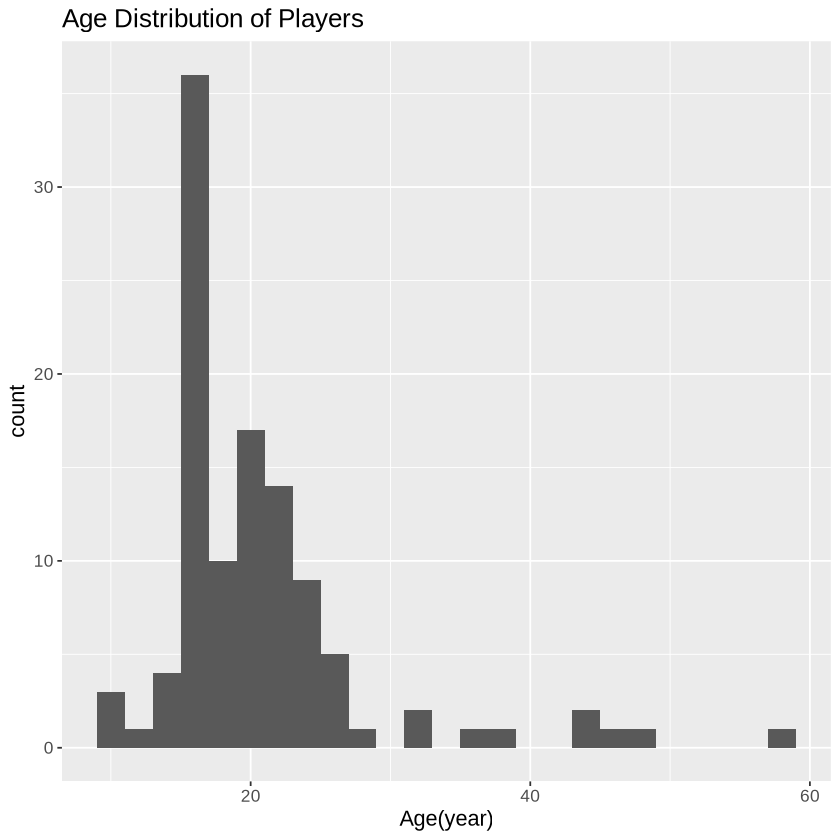

In [13]:
age_distribution <- players_new |>
  ggplot(aes(x = Age)) +
  geom_histogram(binwidth = 2) +
  xlab("Age(year)") +
  ggtitle("Age Distribution of Players") +
  theme(text = element_text(size=13))
age_distribution

This histogram above shows the distribution of players’ ages. From this histogram, we can see that most players are concentrated between 15 and 20 years old. This shows that the majority of the players are teenagers or young adults.

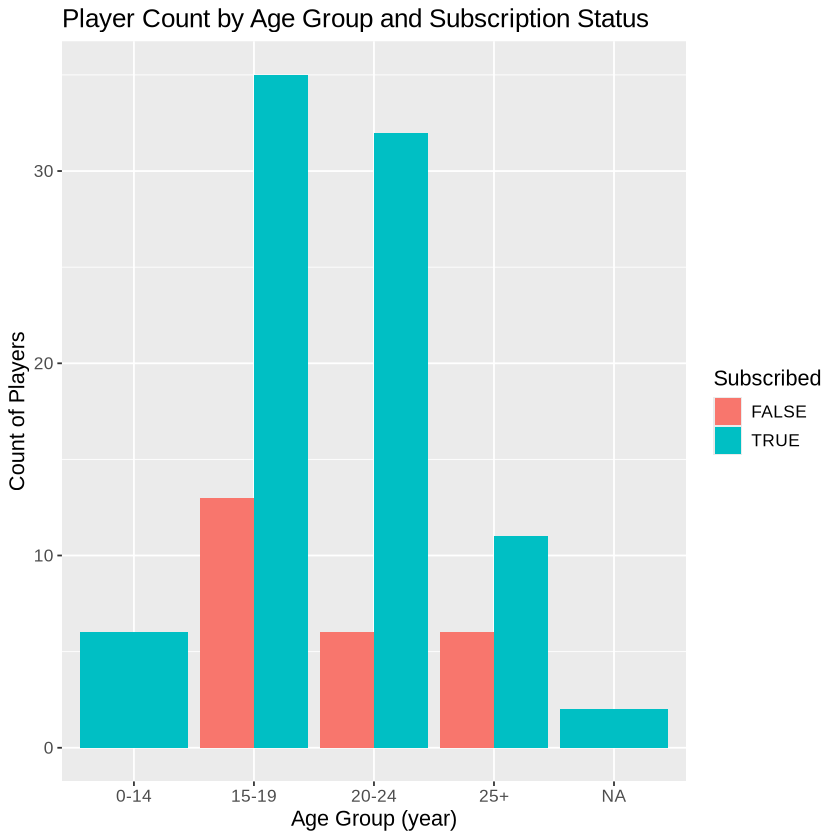

In [14]:
age_subscribe_bar <- players_new |>
  mutate(age_group = cut(Age, breaks = c(0, 14, 19, 24, 100),
                         labels = c("0-14", "15-19", "20-24", "25+"))) |>
  ggplot(aes(x = age_group, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(x = "Age Group (year)", y = "Count of Players",
       fill = "Subscribed",
       title = "Player Count by Age Group and Subscription Status")+
  theme(text = element_text(size=13))

age_subscribe_bar

The bar plot above shows that people between 15-19 and 20-24 years old subscribe the most compared to other age groups.

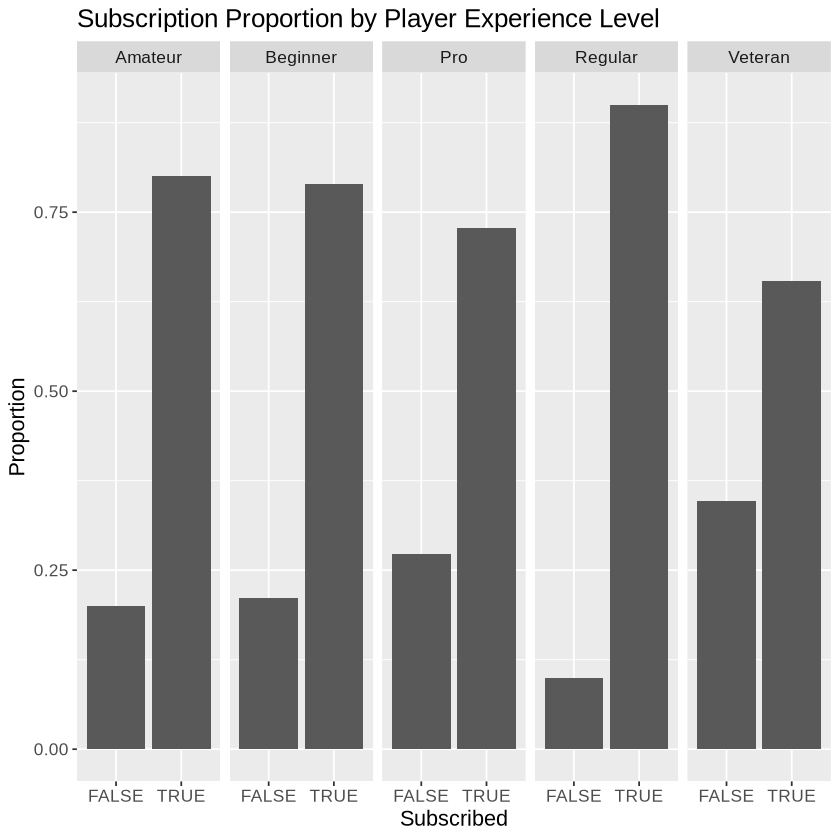

In [15]:
subscribe_experience_prop <- players_new |>
  ggplot(aes(x = subscribe, y = after_stat(prop), group = 1)) +
  geom_bar() +
  xlab("Subscribed") +
  ylab("Proportion") +
  facet_grid(cols = vars(experience)) +
  ggtitle("Subscription Proportion by Player Experience Level") +
  theme(text = element_text(size=13))
subscribe_experience_prop

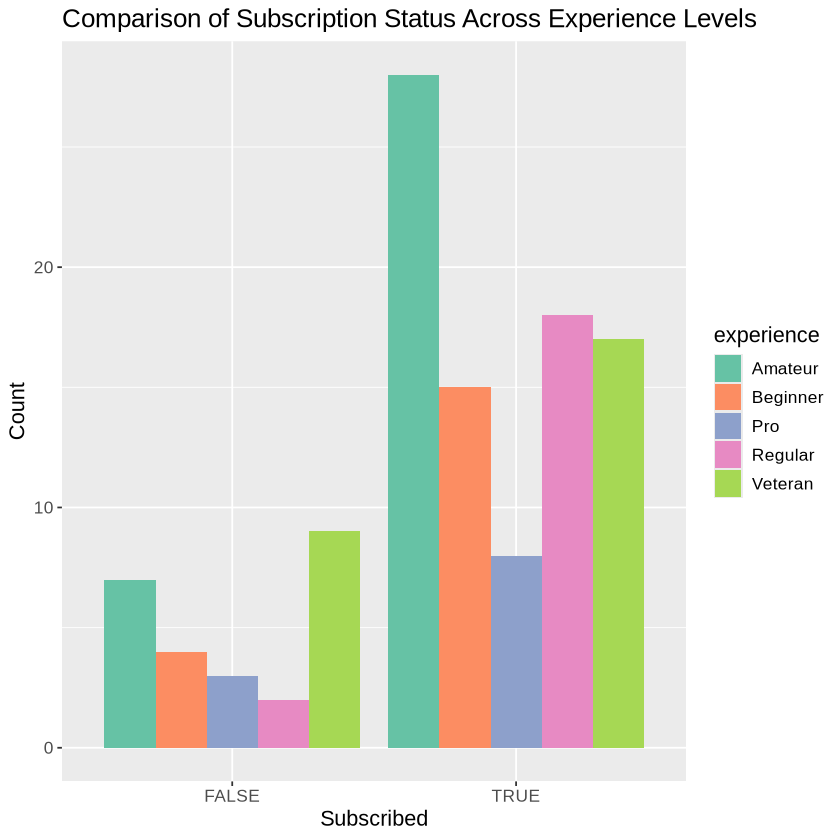

In [16]:
subscribe_experience <- ggplot(players_new, aes(x = subscribe)) + 
  geom_bar(aes(fill = experience), position = "dodge") +
  xlab("Subscribed") +
  ylab("Count") +
  scale_fill_brewer(palette = "Set2") +
  ggtitle("Comparison of Subscription Status Across Experience Levels") +
  theme(text = element_text(size=13))
subscribe_experience

The first bar plot shows that players at the Regular level have the highest subscription rate.The second bar plot above shows that experienced players (Veteran and Regular) seem slightly more likely to subscribe than Beginner and Pro players. It also shows that Amateur players make up most of the subscribers.

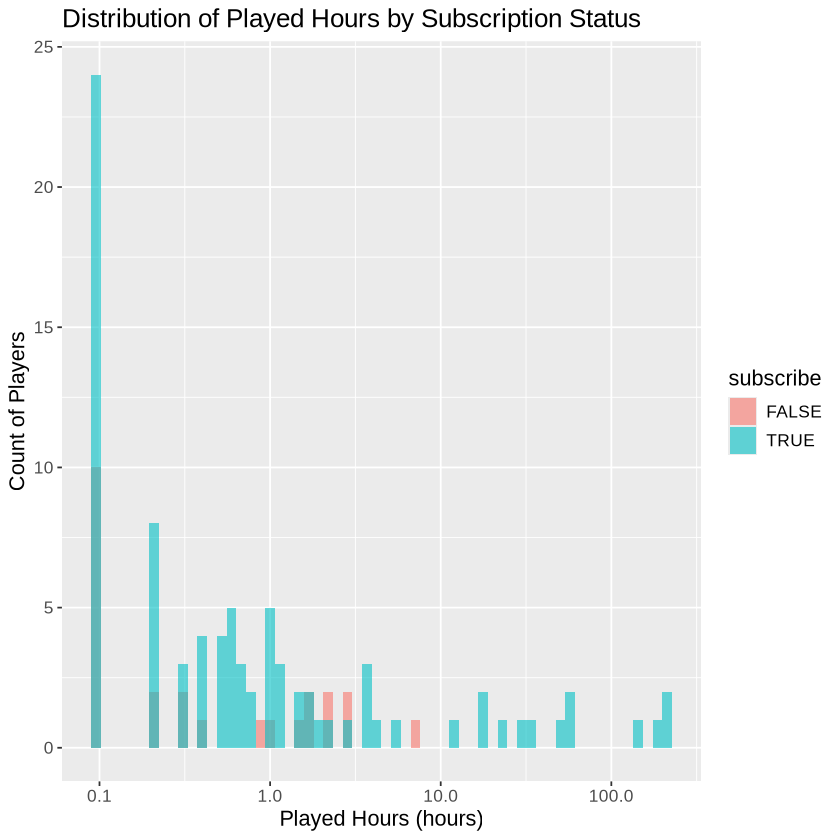

In [17]:
subscribe_played_hours <- ggplot(players_new, aes(x = played_hours, fill = subscribe)) +
  geom_histogram(position = "identity", alpha = 0.6, bins = 60) +
  xlab("Played Hours (hours)") +
  ylab("Count of Players") +
  ggtitle("Distribution of Played Hours by Subscription Status") +
  scale_x_log10() +
  theme(text = element_text(size=13))
subscribe_played_hours

After applying a log scale transformation(`scale_x_log10`), the distribution of played_hours is highly right-skewed(most players having very low play time). Since the two subscription groups show similar patterns and the data are extremely unbalanced, this variable may not be a useful predictor. So I'm not going to use `played_hours` as a predictor.

## 6. Methods and Plan

I plan to use a K-Nearest Neighbors (KNN) classification model to predict whether a player will subscribe based on their age and experience.  
predictors: `Age` and `experience`  
response variable: `subscribe`
### Why is KNN classification appropriate?
Because I want to use numerical predictors(`Age` and `experience`) to predict a categorical variable(`subscribe`).
### Required Assumptions
KNN classification is a simple, intuitive algorithm. There are not specific data or shape assumptions about the data for the algorithm to perform well.
### potential limitations or weaknesses of KNN classification
+ is sensitive to the number of neighbors(K) and the scale of variables
+ perform poorly if the data are imbalanced
+ may not perform well with a large number of predictors
+ becomes very slow as the training data gets larger
+ may not predict well beyond the range of values input in your training data.
### Model comparison and selection
I will tune K by trying different values (e.g.: k=3, k=5, k=7) and use cross-validation to check performance. I will compare the models based on accuracy, and a higher accuracy indicates a better model.
### Data Processing Plan
I will split the dataset into training and testing sets before modeling. Specifically, I will use 75% of the data for training and 25% for testing to evaluate model performance on unseen data. Within the training set, I will use cross-validation to tune the value of K and select the best k for the classifier.

## 7. GitHub Repository

#### github link: https://github.com/Yifan669/Project_individual_plan.git